# 자연어 처리 - 단어 표현  

# < 원-핫 인코딩의 한계 >  
앞서 머신/딥 러닝에서 문자열을 원핫 인코딩으로 변환하여 사용했었다. 하지만 자연어에서는 단어의 개수가 워낙 많기 때문에 벡터의 차원이 너무 커지는 문제점이 있다.   
또한 원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있다. 

In [1]:
from konlpy.tag import Okt  
okt = Okt()  
token = okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [3]:
word2index = {}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [4]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

# < 워드 임베딩 >  
  
워드 임베딩(Word Embedding)은 단어를 벡터로 표현하는 것을 말합니다. 워드 임베딩은 단어를 밀집 표현으로 변환하는 방법을 말한다. 
  
1. 희소 표현  
  
벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 하고 원-핫 벡터도 희소 벡터(sparse vector)다.  
  
장점 : 표현이 쉬움  
단점 : 공간적 낭비. 단어의 유사도 표현 불가능  
  
2. 밀집 표현  
  
밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않고, 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 된다.  
  
Ex)  

희소표현: 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]   
밀집표현: 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...]    
  
3. 워드 임베딩(Word Embedding)  
  
단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 한다. 그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 한다.  
  
|-	|원-핫 벡터	|임베딩 벡터|  
|:---:|:---:|:---:|
|차원|	고차원(단어 집합의 크기)	|저차원|
|다른 표현|	희소 벡터의 일종|	밀집 벡터의 일종|
|표현 방법| 수동|	훈련 데이터로부터 학습함|
|값의 타입|	1과 0|	실수|
  
# < 워드투벡터(Word2Vec) >  
  
1. 분산 표현(Distributed Representation)  
  
'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정  
희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현한다. 이런 표현 방법을 사용하면 단어 간 유사도를 계산할 수 있다.  
  
  =>Word2Vec  
  
2. CBOW(Continuous Bag of Words)  
  
CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
  
예문 : "The fat cat sat on the mat"    
{"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측  
예측해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)  
  
* 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정: 이 범위를 윈도우(window)라고 함  
=>윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고  
  
  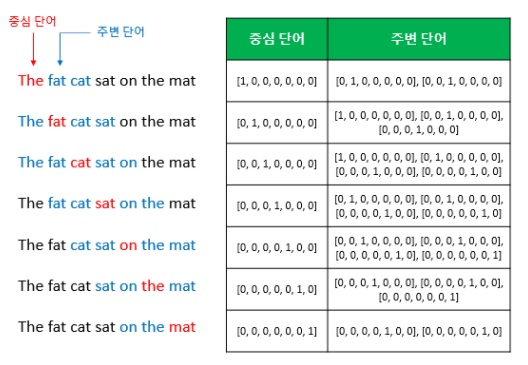  
  

* 슬라이딩 윈도우(sliding window): 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만듬.  
Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 함


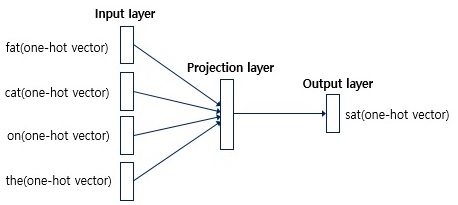    
  
CBOW의 인공 신경망은 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요하다.  
  
Word2Vec는 은닉층(hidden Layer)이 1개인 얕은신경망(Shallow Neural Network)이고 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 한다.  
  


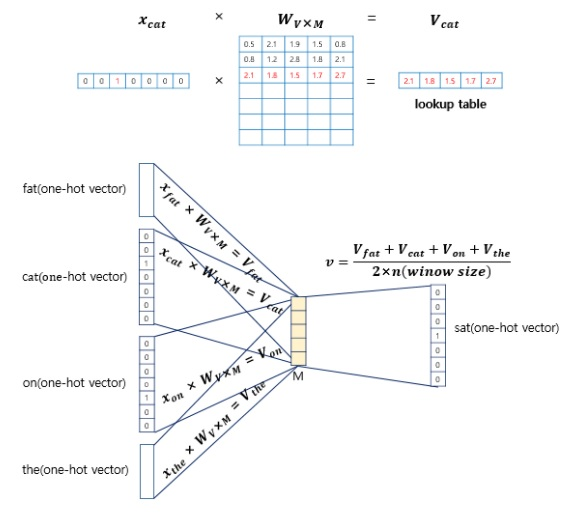  
  
투사층의 크기는 M=5(중심단어1개 + 2 x 윈도우크기)  

입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬. V는 단어 집합의 크기  
이 예의 경우 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬  
인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값으로 초기화되고, 서로 전혀 다른 값이며 학습을 통해서 값이 변경된다.  
  
학습하는 단어들의 원-핫 벡터는 i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일하다. 그래서 이 작업을 룩업 테이블(lookup table)이라고 부른다. 
  
이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구한다. 
  
  



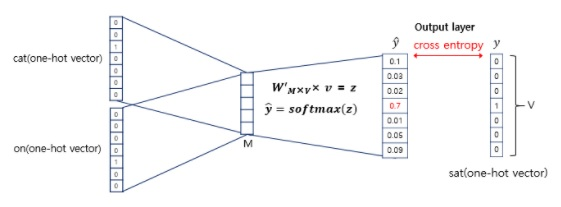   
  
구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해진다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나온다. 
이 벡터에 CBOW는 소프트맥스(softmax) 함수적용하여 0~1 사이의 확률을 계산한 스코어 벡터(score vector)를 반환. 오차는 정답 단어의 원-핫 벡터와 스코어 백터 거리로 계산   
  
  
  
  
  
  

# < 영어 Word2Vec 학습 >

< 단어 벡터 만들기 >

In [52]:
import nltk
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Playdata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* ted_en-20160408.xml이라는 파일 다운로드  
전처리를 통해 태그 제거 및 <content>와 </content> 사이의 내용 추출  

In [53]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x150a5f5f6a0>)

In [54]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
# 저자의 경우 윈도우 바탕화면에서 작업하여서 'C:\Users\USER\Desktop\ted_en-20160408.xml'이 해당 파일의 경로.  
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.

content_text = re.sub(r'\([^)]*\)', '', parse_text)
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.

sent_text = sent_tokenize(content_text)  # sent_tokenize():문장별로 쪼갬 / word_tokenize():단어로 쪼갬
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.

result = []
result = [word_tokenize(sentence) for sentence in normalized_text]
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.

In [55]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [56]:
for line in result[:3]: # 샘플 3개만 출력
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


* Word2Vec 훈련시키기  
  
Word2Vec() 함수 파라메터  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram.  

In [57]:
# pip install gensim
from gensim.models import Word2Vec, KeyedVectors
model = Word2Vec(sentences=result, window=5, min_count=5, workers=4, sg=0)

In [58]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8325873613357544), ('guy', 0.8069223761558533), ('boy', 0.7628347873687744), ('lady', 0.7393947243690491), ('gentleman', 0.7366518378257751), ('girl', 0.7311863899230957), ('soldier', 0.709530770778656), ('kid', 0.6889546513557434), ('friend', 0.6686536073684692), ('poet', 0.6658967137336731)]


* Word2Vec 모델 저장하고 로드하기

In [13]:
model.wv.save_word2vec_format('./eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [14]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8507380485534668), ('guy', 0.8090187311172485), ('lady', 0.7635051608085632), ('girl', 0.7484298944473267), ('boy', 0.7467021346092224), ('soldier', 0.7067389488220215), ('kid', 0.7045156955718994), ('gentleman', 0.6973686814308167), ('poet', 0.6797754764556885), ('rabbi', 0.6654204726219177)]


# < 한국어 Word2Vec 학습 >

1. https://dumps.wikimedia.org/kowiki/latest/ 에서 'kowiki-latest-pages-articles.xml.bz2' 항목 다운로드  
2. pip install wikiextractor  
3. python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2 

In [8]:
txt = '회색늑대(학명: Canis lupus, 영어: wolf, 또는 gray/grey wolf)는 북아메리카, 유라시아, 북아프리카 황무지에 서식하는 개과의 종으로 이리나 말승냥이로도 불린다. 늑대는 수컷 평균 43~45 kg, 암컷 평균 36~38.5kg이고 어깨높이는 0.6~0.9m로 개과에 속한 종 중 가장 큰 종이다.[2] 늑대는 썰매개 또는 저먼 셰퍼드와 모양과 비율이 비슷하나,[3] 늑대가 큰 머리, 좁은 가슴, 긴 다리, 똑바로 선 꼬리와 큰 발을 가지고 있는 점이 다르다.[4] 겨울 털은 크고 무성하며 털 색은 일반적으로 얼룩덜룩한 회색이지만 거의 순수한 흰색, 붉은색, 갈색, 검은색 등의 다양한 색도 있다.[3]'
txt+='늑대의 속은 개속에 속하며, 회색늑대는 더 작은 아속인 코요테나 황금자칼과 비교하여 형태학적으로 몸집이 큰 먹이를 사냥하는 데 갖춰주었고 좀 더 집단적인 성격을 갖추며, 고도의 의사소통을 갖추어서[5][6] 전문종으로 분류한다.[7] 늑대는 사회적 동물로서 한 쌍의 성체와 그 자손으로 구성된 핵가족의 부계사회 형태로 이루어져 있다.[8] 늑대는 최상위 포식자로 천적이 호랑이[9][10][11][12]와 표범, 불곰과 회색곰, 검독수리 그리고 인간밖에 없다. 다만 검독수리의 경우 중소형 개체만을 노리며 대형 개체는 사냥하지 않는다. 늑대는 주로 대형 유제류를 먹이로 삼으나 이 먹이들이 부족한 경우에는 작은 동물, 가축, 썩은 고기, 쓰레기를 먹기도 한다.[13]'
txt+='회색늑대는 세계에서 가장 잘 연구된 동물 중 하나이며, 다른 야생 동물 종들보다 더 많은 연구 서적이 있다.[14] 늑대는 인간과의 오랜 역사를 가지고 있으며, 보통 농업 사회에서 가축을 공격하는 경멸받는 존재로 인식되어서 사냥되기도 하였지만, 반대로 일부 아메리카 토착민들에게는 존중되기도 하였다.[13] 개의 선조는 늑대이며, 북아시아에서 가축화가 시작되었다.[15] 인간 사회에서는 늑대가 중세 늑대의 인간 공격으로 발생한 광견병에 기인하여 두려움의 상징으로 퍼져 있었다. 광견병에 걸리지 않은 늑대가 주로 어린이들을 공격한 적도 있으나, 이는 특이한 경우이고 상대적으로 늑대는 인간 사회와 떨어져서 생활하며 사냥꾼과 목동들로 인해 인간이 두려운 존재로 습득되었다.[16] 늑대는 사냥과 덫으로 인해 종 범위가 3번째로 빨리 감소하였으나, 여전히 광범위한 범위의 서식지와 안정적인 개체 수로 인해 세계적으로 종 감소 위협은 아니라고 인식되어 국제 자연 보호 연맹은 "관심 필요"의 낮은 등급을 부여했다.[17]'
txt

'회색늑대(학명: Canis lupus, 영어: wolf, 또는 gray/grey wolf)는 북아메리카, 유라시아, 북아프리카 황무지에 서식하는 개과의 종으로 이리나 말승냥이로도 불린다. 늑대는 수컷 평균 43~45 kg, 암컷 평균 36~38.5kg이고 어깨높이는 0.6~0.9m로 개과에 속한 종 중 가장 큰 종이다.[2] 늑대는 썰매개 또는 저먼 셰퍼드와 모양과 비율이 비슷하나,[3] 늑대가 큰 머리, 좁은 가슴, 긴 다리, 똑바로 선 꼬리와 큰 발을 가지고 있는 점이 다르다.[4] 겨울 털은 크고 무성하며 털 색은 일반적으로 얼룩덜룩한 회색이지만 거의 순수한 흰색, 붉은색, 갈색, 검은색 등의 다양한 색도 있다.[3]늑대의 속은 개속에 속하며, 회색늑대는 더 작은 아속인 코요테나 황금자칼과 비교하여 형태학적으로 몸집이 큰 먹이를 사냥하는 데 갖춰주었고 좀 더 집단적인 성격을 갖추며, 고도의 의사소통을 갖추어서[5][6] 전문종으로 분류한다.[7] 늑대는 사회적 동물로서 한 쌍의 성체와 그 자손으로 구성된 핵가족의 부계사회 형태로 이루어져 있다.[8] 늑대는 최상위 포식자로 천적이 호랑이[9][10][11][12]와 표범, 불곰과 회색곰, 검독수리 그리고 인간밖에 없다. 다만 검독수리의 경우 중소형 개체만을 노리며 대형 개체는 사냥하지 않는다. 늑대는 주로 대형 유제류를 먹이로 삼으나 이 먹이들이 부족한 경우에는 작은 동물, 가축, 썩은 고기, 쓰레기를 먹기도 한다.[13]회색늑대는 세계에서 가장 잘 연구된 동물 중 하나이며, 다른 야생 동물 종들보다 더 많은 연구 서적이 있다.[14] 늑대는 인간과의 오랜 역사를 가지고 있으며, 보통 농업 사회에서 가축을 공격하는 경멸받는 존재로 인식되어서 사냥되기도 하였지만, 반대로 일부 아메리카 토착민들에게는 존중되기도 하였다.[13] 개의 선조는 늑대이며, 북아시아에서 가축화가 시작되었다.[15] 인간 사회에서는 늑대가 중세 늑대의 인간 공격으로 발생한 광견병에 기인하여 두려움의 상징으로 퍼져 있었다. 광견병에 걸

In [9]:
f = open('ttt.txt', 'w')
f.write(txt)
f.close()

< 데이터 전처리 >

In [10]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('ttt.txt', encoding="euc-kr")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
        result.append(temp) # 결과에 저장
    
fread.close()

In [11]:
result

[['회색늑대',
  '학명',
  '영어',
  '북아메리카',
  '유라시아',
  '북아프리카',
  '황무지',
  '서식',
  '개',
  '종',
  '리나',
  '말승냥이',
  '도',
  '늑대',
  '수컷',
  '평균',
  '암컷',
  '평균',
  '어깨',
  '로',
  '개과',
  '속',
  '종',
  '중',
  '가장',
  '종이',
  '늑대',
  '썰매개',
  '저먼',
  '셰퍼드',
  '모양',
  '비율',
  '늑대',
  '머리',
  '가슴',
  '다리',
  '똑바로',
  '선',
  '꼬리',
  '발',
  '가지',
  '점',
  '겨울',
  '무성',
  '털',
  '색',
  '일반',
  '회색',
  '거의',
  '흰색',
  '은색',
  '갈색',
  '검은색',
  '등',
  '색도',
  '늑대',
  '속',
  '개속',
  '속',
  '회색늑대',
  '더',
  '아속',
  '코요테',
  '황금자칼',
  '비교',
  '형태학',
  '몸집',
  '먹이',
  '사냥',
  '데',
  '좀',
  '더',
  '집단',
  '성격',
  '고도',
  '의사소통',
  '전문종',
  '분류',
  '늑대',
  '사회',
  '동물',
  '로서',
  '쌍',
  '성체',
  '그',
  '자손',
  '구성',
  '핵가족',
  '부계',
  '사회',
  '형태',
  '늑대',
  '최',
  '상위',
  '포식자',
  '천적',
  '호랑이',
  '표범',
  '불곰',
  '회색곰',
  '검독수리',
  '인간',
  '다만',
  '검독수리',
  '경우',
  '중소',
  '개체',
  '노리',
  '대형',
  '개체',
  '사냥',
  '늑대',
  '주로',
  '대형',
  '유제류',
  '먹이',
  '이',
  '먹이',
  '경우',
  '동물',
  '가축',
  '고기',
  '쓰레기',
  '

In [26]:
len(result)

27

< Word2Vec 모델 훈련 >

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(result, window=5, min_count=5, workers=4, sg=0)

< 유사 단어 구분 >

In [29]:
model_result1=model.wv.most_similar("늑대")
print(model_result1)

[('인간', -0.010839181020855904), ('사회', -0.052346743643283844), ('종', -0.111670583486557)]


In [30]:
model_result2=model.wv.most_similar("사회")
print(model_result2)

[('종', -0.013514960184693336), ('인간', -0.02367166243493557), ('늑대', -0.052346743643283844)]


# < 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) >  
  
감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능을 얻을 수 있다.  
  
1) 영어 모델

In [32]:
import gensim
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
# 구글의 사전 훈련된 Word2Vec 모델을 로드합니다.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [33]:
model.vectors.shape

(3000000, 300)

In [34]:
print (model.similarity('this', 'is')) # 두 단어의 유사도 계산하기
print (model.similarity('post', 'book'))

0.40797037
0.057204384


In [35]:
print(model['book']) # 단어 'book'의 벡터 출력

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [37]:
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [38]:
model.most_similar("desk")

[('desks', 0.6952426433563232),
 ('Drobe_news', 0.5427331924438477),
 ('bookshelf', 0.537420392036438),
 ('cubicle', 0.5358735918998718),
 ('Desk', 0.5211291313171387),
 ('desk_drawer', 0.5114266276359558),
 ('office', 0.5064699649810791),
 ('agent_Alexei_Spiridonov', 0.5049833655357361),
 ('cluttered_desk', 0.5029998421669006),
 ('steno_pad', 0.49945971369743347)]

2) 한글 모델

In [1]:
# 에러 발생시: pip install gensim==3.8.1 --user

import gensim
model = gensim.models.Word2Vec.load('./ko/ko.bin')

c:\users\playdata\appdata\local\programs\python\python39\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [3]:
result=model.wv.most_similar("사람")
print(result)

[('젊은이', 0.6494427919387817), ('여인', 0.6287257671356201), ('백성', 0.6063710451126099), ('포졸', 0.6043275594711304), ('죄인', 0.5960500836372375), ('선비', 0.5868039131164551), ('부녀자', 0.5654411315917969), ('죄수', 0.5639811754226685), ('구경꾼', 0.5620019435882568), ('손님', 0.5589558482170105)]
